<center><h2>ATTENTION! Avant de démarrer, merci de suivre la procédure en 4 étapes ci-dessous pour le bon fonctionnement de la page</h2></center>
<b style="color:red;">1°) Cliquez sur le bouton "Sans Confiance"</b> 
<center><img src="./trust.png"></center>
<p>
<br></p>
<b style="color:red;">2°) Cliquer sur le bouton rouge "Faire Confiance" pour autoriser l'exécution des scripts de la page</b>
<center><img src="./trust2.png"></center>
<p>
<br></p>
<b style="color:red;">3°) Cliquez sur l'icone "redémarrer le noyau et ré-exécuter tout le notebook"</b>
<center><img src="./trust3.png"></center>
<p>
<br></p>
<b style="color:red;">4°) Cliquez sur le bouton rouge "Relancer et exécuter toutes les cellules" pour exécuter tous les programmes pythons déjà présents sur la page</b>
<center><img src="./trust4.png"></center>

# TP5 - Signal périodique et production d'un son

<h2>Travail demandé:</h2>

<ol><li> Inscrire vos réponses, programmes, images dans les blocs réponse prévus pour construire votre compte rendu</li>
<li> Vous pouvez tester et/ou modifier les différents morceaux de code proposés</li>
<li> Sauvegardez régulièrement votre travail. Attention, la sauvegarde se fait dans un espace temporaire et le fichier sera perdu au bout de quelques heures. </li>
<li> Téléchargez votre fichier au <b>format Notebook</b> si vous souhaitez pouvoir le <b>modifier plus tard</b>. Téléchargez le au <b> format html</b> si vous souhaitez simplement une <b>trace écrite</b> ou pour le rendre au professeur.</li></ol>

In [1]:
# This is a cell to hide code snippets from displaying
# This must be at first cell!

from IPython.display import HTML

hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_toggle') {
        $(this).hide();
        $(this).parent().next().find('div.input').hide();
        $(this).parent().next().find('div.output').hide();
       
      }
    });

    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
    if (id == 0 ){
      $(this).show();
            $(this).parent().next().find('div.input').show();
        $(this).parent().next().find('div.output').show();
    }
    });
    $('div.output_prompt').css('opacity', 1);
  
  }
  code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>''')
#<form action="javascript:code_toggle()"><input style="opacity:0" type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# fonction pour cacher une cellule
# à exécuter une fois au début pour la mettre en mémoire

from IPython.display import HTML
import random



def hide_toggle(for_next=True,texte="Montrer/cacher"):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'
  

    toggle_text = texte  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        js_hide_current = this_cell + '.find("div.input").hide();'+this_cell+ '.find("div.output").hide();'

    js_f_name = f'code_toggle_{random.randint(1,2**64)}'

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
                {cell_selector}.find('div.output').toggle();
                {this_cell}.find('div.input').hide();

            }}
             $('div.prompt').hide();
        </script>

        <form action="javascript:{f_name}()"><input type="submit" id="toggleButton" value={toggle_text}></form>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text,
        this_cell=this_cell
    )
    

    return HTML(html)




In [3]:
hide_toggle(texte="Installation_automatique_des_bibliothèques")

In [4]:
# Installation des bibliothèques à exécuter une fois au début
!pip install matplotlib

<h3>Matériel :</h3>
<ul><li>Arduino nano</li>
    <li>Breadboard</li>
    <li>Fils</li>
    <li>Buzzer</li>
    <li>Ordinateur</li></ul>
    <br>
<h3>Logiciels :</h3>
<ul><li>Navigateur web type Mozilla firefox</li>
    <li>IDE Arduino</li></ul>
    <br>

In [5]:
# imports à exécuter une fois au début
from math import pi,cos
import matplotlib.pyplot as plt

In [6]:
%matplotlib notebook

# Sujet

<p>Le TP est constitué de deux parties, une sur python pour le tracé et l'étude de fonctions périodiques et la deuxième sur arduino pour la production d'un son à l'aide d'un buzzer.</p>

<h2>Partie 1 - Fonctions périodiques</h2>


<b>1°)</b> Ecrire ci-dessous <b style="color:red;">en python</b> une fonction <b>cosinus</b> qui prend comme arguments trois floats: <b>le temps t, l'amplitude A et la période T</b> et qui renvoie  la valeur de $A \times cos(2 \pi \frac{t}{T})$. Votre fonction pourra utiliser la fonction cos et la variable pi déjà chargés en mémoire.

In [7]:
hide_toggle(texte="Correction")

In [8]:
def cosinus(t, A, T):
    return A*cos(2*pi*t/T)

<b>2°)</b> Ecrire ci-dessous un programme <b style="color:red;">en python</b> permettant de construire <b>une liste temps</b> de 1001 valeurs de t entre 0 et 10 ms (inclus), et <b>une liste y</b> de valeurs de la fonction précédente pour A = 3.5 et T = 0.002 pour chacun des temps précédents.

In [9]:
temps = []
y = []


In [10]:
hide_toggle(texte="Correction")

In [11]:
temps = []
y = []
for i in range(1001):
    temps.append(0.010*i/1000)
    y.append(cosinus(t=temps[i],A=3.5,T=0.002))

<b>3°)</b> Ecrire ci-dessous un programme <b style="color:red;">en python</b> permettant de construire une représentation graphique de la <b>fonction cosinus de la question 1°)</b> pour A = 3.5 et T = 0.002 sur 5 périodes. Vous pourrez utiliser les listes construites à la question 2.
<p>Vous pourrez utiliser la <a href="./methode_courbe.ipynb">fiche méthode_courbe</a> fournie.</p>

In [12]:
hide_toggle(texte="Correction")

<IPython.core.display.Javascript object>


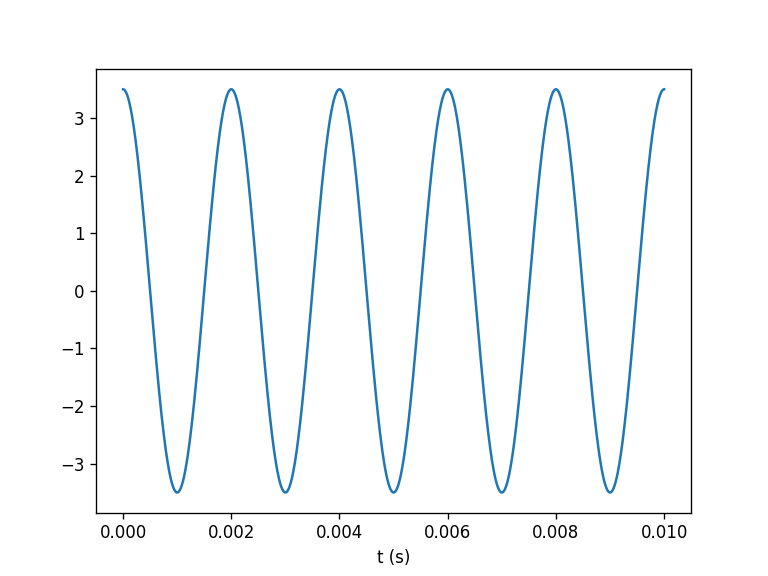

In [13]:
plt.figure("Tracer une fonction périodique")
plt.plot(temps,y)
plt.xlabel("t (s)")
plt.show()

<b>4°)</b> Ecrire ci-dessous un programme <b style="color:red;">en python</b> permettant de construire une représentation graphique de la <b>fonction cosinus de la question 1°)</b> pour A = 3.5 et T = 0.002 et pour A = 3.5 et T = 0.003 sur un même graphique pour t allant de 0 à 10 ms. Il faudra donc construire au préalable une liste y1 de valeurs de la première fonction et un liste y2 de valeurs de la deuxième fonction. Vous prendrez soin d'<b>identifier les deux courbes sur le graphique en utilisant une légende</b>.

In [14]:
hide_toggle(texte="Correction")

<IPython.core.display.Javascript object>


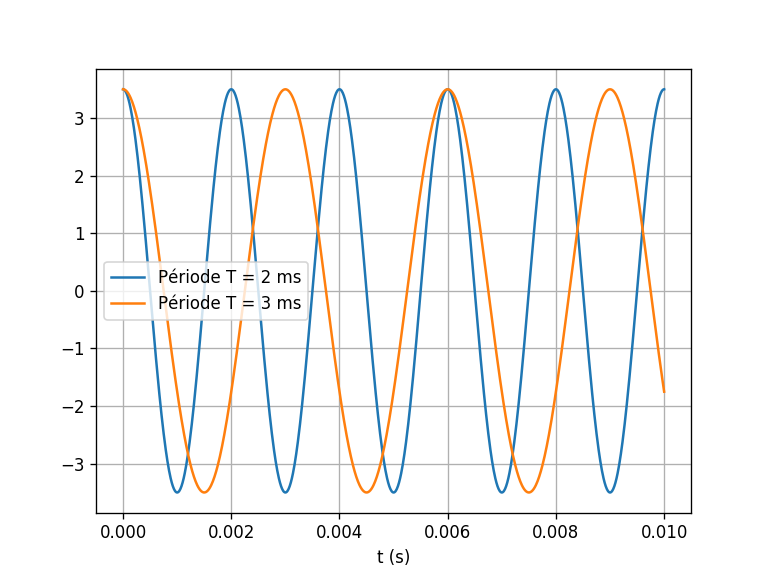

In [15]:
#Construire les listes
temps = []
y1 = []
y2 = []
for i in range(1001):
    temps.append(i*0.002*5/1000)
    y1.append(cosinus(t=temps[i],A=3.5,T=0.002))
    y2.append(cosinus(t=temps[i],A=3.5,T=0.003))
    
#Construire le graphique
plt.figure("Question 4°)")
plt.plot(temps,y1,label="Période T = 2 ms")
plt.plot(temps,y2,label="Période T = 3 ms")
plt.legend()
plt.xlabel("t (s)")
plt.grid()
plt.show()

<b>5°)</b> Ecrire ci-dessous un programme <b style="color:red;">en python</b> permettant de construire une représentation graphique de la <b>fonction cosinus de la question 1°)</b> pour A = 1.5 et T = 0.002 et pour A = 3.5 et T = 0.002 sur <b>deux graphiques côte à côte à la même échelle</b> pour t allant de 0 à 10 ms.

In [16]:
hide_toggle(texte="Correction")

<IPython.core.display.Javascript object>


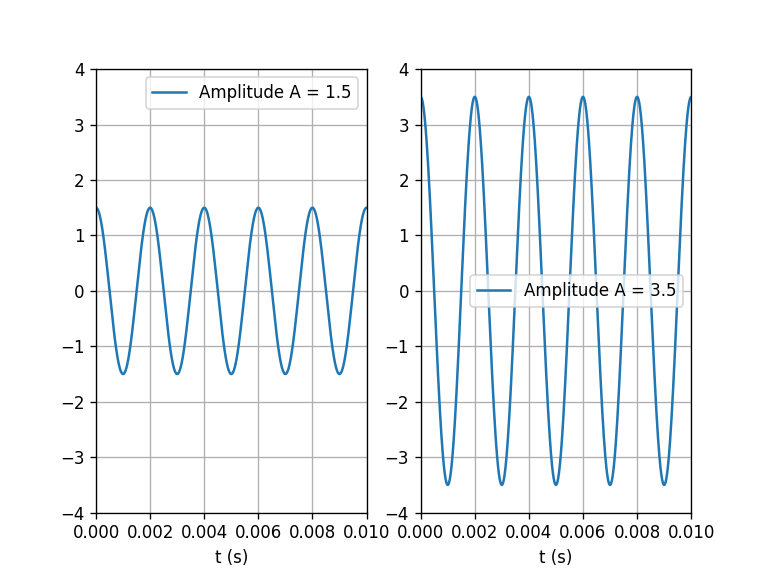

In [17]:
#Construire les listes
temps = []
y1 = []
y2 = []
for i in range(1001):
    temps.append(i*0.002*5/1000)
    y1.append(cosinus(t=temps[i],A=1.5,T=0.002))
    y2.append(cosinus(t=temps[i],A=3.5,T=0.002))
    
#Construire le graphique
plt.figure("Question 5°)")
plt.subplot2grid((1,2),(0,0))
plt.plot(temps,y1,label="Amplitude A = 1.5")
plt.legend()
plt.xlabel("t (s)")
plt.ylim([-4.,4.])
plt.xlim([0.,0.01])
plt.grid()

plt.subplot2grid((1,2),(0,1))
plt.plot(temps,y2,label="Amplitude A = 3.5")
plt.legend()
plt.xlabel("t (s)")
plt.ylim([-4.,4.])
plt.xlim([0.,0.01])
plt.grid()

plt.show()

On donne la fonction suivante permettant de représenter une onde. Elle nécessite une valeur de position <b>x</b> et de temps <b>t</b>. Les caractéristiques de cette onde sont définies dans la fonction par une célérité de 340 m/s et une période de 2 ms.

In [18]:
def onde(x,t):
    c = 340.
    T = 0.002
    return cos(2*pi*(t/T-x/(c*T)))

<b>6°)</b> Ecrire ci-dessous un programme <b style="color:red;">en python</b> permettant de représenter la fonction <b>onde</b> pour x allant de 0 à 2m. On construira 5 courbes sur une même figure, pour t = 0., 0.5, 1.0, 1.5, et 2.0 ms.

In [19]:
hide_toggle(texte="Correction")

<IPython.core.display.Javascript object>


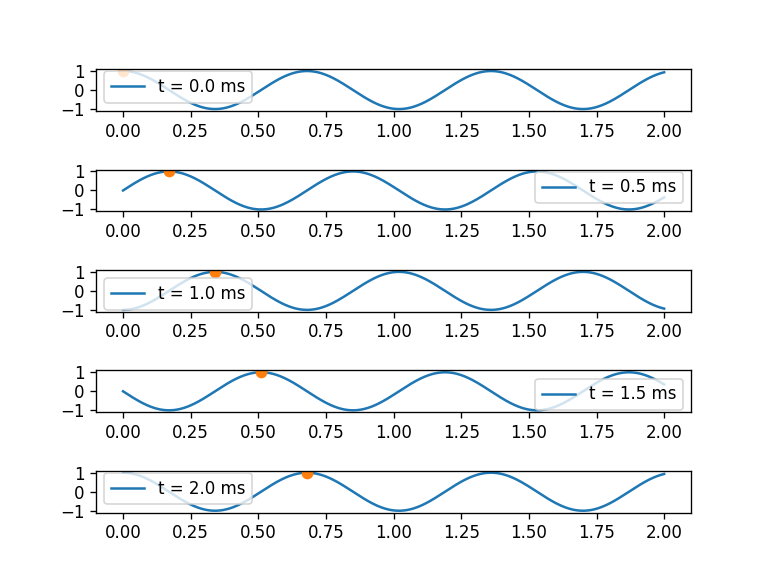

In [20]:
t = [2e-3*i/4 for i in range(5)]
x = [2.*i/1000 for i in range(1001)]

plt.figure("Question 6°)")
for i in range(len(t)):
    y3 = [onde(val,t[i]) for val in x]
    plt.subplot2grid((9,1),(2*i,0))
    plt.plot(x,y3,label="t = {:.1f} ms".format(t[i]*1000))
    plt.plot([340*t[i]],[onde(340*t[i],t[i])],"o") #Point rouge pour mieux visualiser la propagation
    plt.legend()
plt.show()

<b>7°)</b> Ecrire ci-dessous <b style="color:red;">en python</b> une fonction <b>creneau</b> qui prend comme arguments deux float: <b>le temps t, et la période T</b> et qui renvoie 5. pendant la première demi période et 0. pendant la demi période suivante. <b>On remarquera que t%T renvoie une valeur entre 0 et T, T exclu.</b>

In [21]:
def creneau(t,T):
    
    return

In [22]:
hide_toggle(texte="Correction")

In [23]:
def creneau(t, T):
    if t%T<T/2:
        return 5.
    else:
        return 0.

<b>8°)</b> Ecrire ci-dessous un programme <b style="color:red;">en python</b> permettant de construire une représentation graphique de la <b>fonction creneau de la question 7°)</b> pour T = 0.002 et t allant de 0 à 10 ms.

In [26]:
hide_toggle(texte="Correction")

<IPython.core.display.Javascript object>


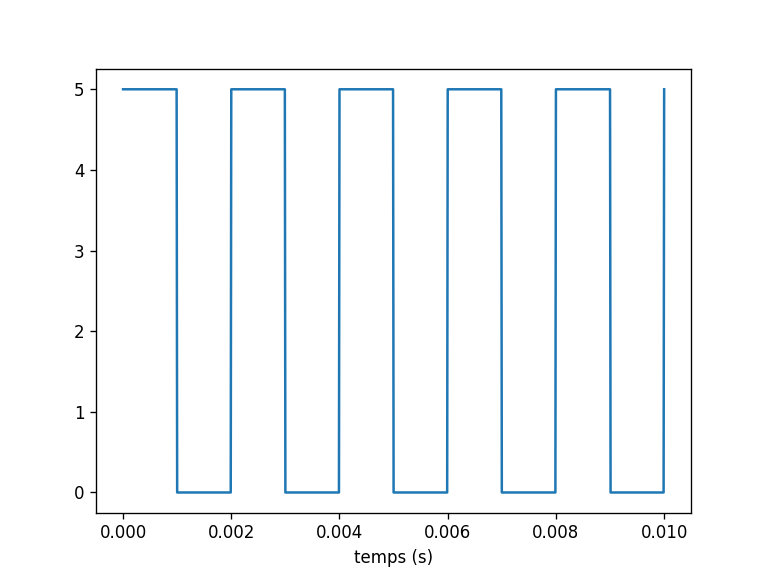

In [25]:
temps2 = [0.010*i/1000 for i in range(1001)]
y2 = [creneau(val,0.002) for val in temps2]

plt.figure("Creneau")
plt.plot(temps2,y2)
plt.xlabel("temps (s)")
plt.show()

<h2>Partie 2 - Production de son à l'aide d'un microcontrôleur</h2>

<p>Pour produire un son à l'aide d'une carte Arduino, réalisez le <b>montage de la figure 1.</b> ci-dessous. Réalisez ce montage sans relier la carte Arduino à l’ordinateur.</p>

<p><center><b>Figure 1. Montage à réaliser</b>
<img src="./TP5_figure1.png"></center></p>


Téléchargez le programme <a href="./buzzer.ino" target="_blank">buzzer.ino</a> fourni.  et <b>téléversez le dans votre carte Arduino</b> (attention de bien régler <b style="color:red;">le type de carte, le port et le processeur)</b>. Vous devriez entendre un son produit par le buzzer.

<b>9°)</b> D'après la lecture du programme buzzer.ino, quelle est la fréquence du signal sonore produit ?

<b>10°)</b> Modifier ce programme pour générer un signal sonore à 1kHz environ.

<b>11°)</b> Ce son vous paraît-il plus aigu ou plus grave que le précédent ?